<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE341L-ImageProcessing/LAB10/LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from numpy import r_
import scipy

In [108]:
img_path='https://raw.githubusercontent.com/adityav1810/Semester_5_Labs/master/ECSE341L-ImageProcessing/LAB10/lab10.jpg'
img_path='/content/zelda.tif'

In [109]:
from skimage import io
img = io.imread(img_path)
img=cv2.resize(img, (512, 512))

TiffPages: invalid page offset 219090958


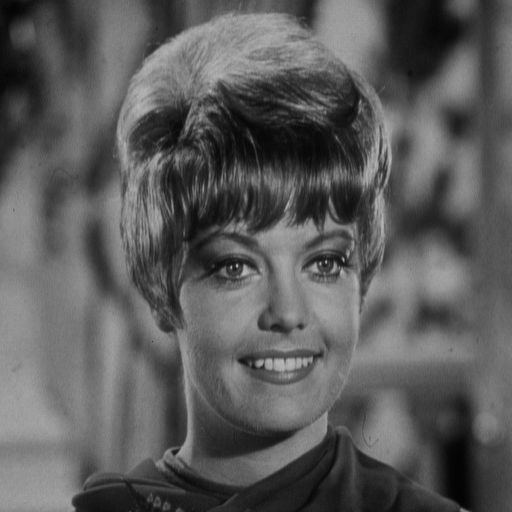

In [110]:
cv2_imshow(img)

In [111]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read lena RGB image and convert to grayscale
im = rgb2gray(img) 
imF = dct2(im)
im1 = idct2(imF)

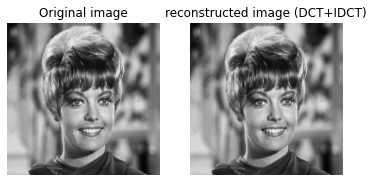

In [112]:
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)')
plt.show()

In [113]:

def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [115]:
imsize = im.shape
dct = np.zeros(imsize)
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

im_dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )


In [116]:
dft = np.zeros(imsize,dtype='complex');
im_dft = np.zeros(imsize,dtype='complex');

# 8x8 DFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

# Thresh
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))
# 8x8 iDFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )

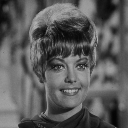

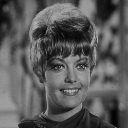

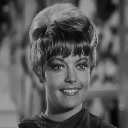

In [123]:

images=[im,im1,abs(im_dft)]
for image in images:
  image=cv2.resize(image,(128,128))
  cv2_imshow(image)


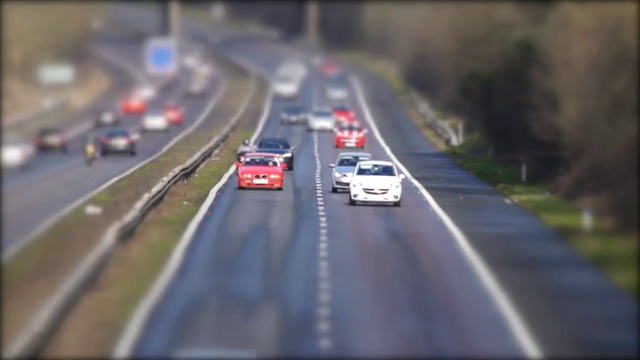

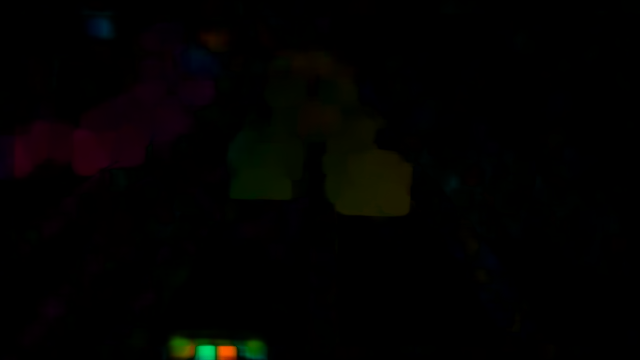

In [131]:
 
cap = cv2.VideoCapture("/content/Car - 2165.mp4") 
ret, first_frame = cap.read() 
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY) 
mask = np.zeros_like(first_frame) 
mask[..., 1] = 255
flag=1
while(cap.isOpened() & flag !=0): 
    ret, frame = cap.read() 
    cv2_imshow(frame) 
      
    # Converts each frame to grayscale - we previously  
    # only converted the first frame to grayscale 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
      
    # Calculates dense optical flow by Farneback method 
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,  
                                       None, 
                                       0.5, 3, 15, 3, 5, 1.2, 0) 
      
    # Computes the magnitude and angle of the 2D vectors 
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1]) 
      
    # Sets image hue according to the optical flow  
    # direction 
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow 
    # magnitude (normalized) 
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX) 
      
    # Converts HSV to RGB (BGR) color representation 
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR) 
      
    # Opens a new window and displays the output frame 
    cv2_imshow(rgb) 
      
    # Updates previous frame 
    prev_gray = gray 
      
    # Frames are read by intervals of 1 millisecond. The 
    # programs breaks out of the while loop when the 
    # user presses the 'q' key 
    flag+=1
    if flag==5:
      flag=0
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# The following frees up resources and 
# closes all windows 
cap.release() 
cv2.destroyAllWindows() 